# Assignments for "Understanding The Relationship"

To close out this lesson, you're going to do three assignments. For the first assignment, you'll write up a short answer to a question in a Gist file.  For the second two assignments, you'll do your work in Jupyter notebooks, and you should link to those notebooks in the same Gist file.

Please submit a single Gist file containing the answer to first assignment, plus links for second two.

## 1. Interpretion and signficance

Suppose that we would like to know how much families in the US are spending on recreation annually. We estimated the following model:

$$ expenditure = 873 + 0.0012annual\_income + 0.00002annual\_income^2 - 223.57have\_kids $$

*expenditure* is the annual spending on recreation in US dollars, *annual_income* is the annual income in US dollars and *have_kids* is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer and save in a Gist. 

In [ ]:
# If we interpret the equation:
#  - It is understood from the formula that the increase in the number of children will also increase the amount of expenses.
#  - The coefficient of the annual income feature is 0.12%, which indicates that the increase or decrease in annual income will make a small change on the total expenditure.
#  - The increase or decrease in the annual income square will have a very small effect on total expenditures.

# We can look at t-statistics and associated p-values.

## 2. Weather model

In this exercise, you'll work with the historical temperature data from the previous lesson. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

- First, load the dataset from the **weatherinszeged** table from Kaggle.
- Build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables? 
- Next, include the interaction of *humidity* and *windspeed* to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for *humidity* and *windspeed* change? Interpret the estimated coefficients.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [3]:
df["temp_diff"]=df["Temperature (C)"]-df["Apparent Temperature (C)"]

Y=df["temp_diff"]
X=df[["Humidity","Wind Speed (km/h)"]]

lrm=linear_model.LinearRegression()
lrm.fit(X,Y)

LinearRegression()

In [4]:
print("Coefficients: ",lrm.coef_)
print("Bias: ",lrm.intercept_)

Coefficients:  [3.02918594 0.11929075]
Bias:  -2.4381054151876937


In [5]:
from sklearn import linear_model
import statsmodels.api as sm
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              temp_diff   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        00:27:51   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4381      0.021   -115.948      0.000      -2.479      -2.397
Humidity              3.0292      0.024    126.479      0.000       2.982       3.076
Wind Speed (km/h)     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# -The value of -const = -2.4381. When all values are 0, the expected value will be like const.

# -Humidity coefficient is 3.029; that is, a one unit increase in humidity will result in a 3.03 increase in temperature.

# -The coefficient of wind speed is also 0.119; that is, an increase in wind will result in an increase in temperature 
#by 0.12.

#When we look at the p value of the OLS t test, we can interpret whether the explanatory variables are sufficient 
#in explaining the target variable.The smaller the p value is 0.05, the more significant the explanatory variable is in 
#the prediction of the target variable. We see that the p values of Humidity and Wind Speed variables are 0.000. .

##  3. House prices model

In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle.
- Run your house prices model again and interpret the results. Which features are statistically significant and which are not?
- Now, exclude the insignificant features from your model. Did anything change?
- Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have more prominent effect on the house prices?
- Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [7]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
l = ["MSZoning","Street","BldgType","Heating","CentralAir","Electrical","KitchenQual","SaleCondition"]
for item in l:
    print(item)
    print (df[item].unique())

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
['Pave' 'Grvl']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Heating
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
CentralAir
['Y' 'N']
Electrical
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
KitchenQual
['Gd' 'TA' 'Ex' 'Fa']
SaleCondition
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


In [9]:
df.corr()["SalePrice"].reset_index()

,index,SalePrice
0,Id,-0.021917
1,MSSubClass,-0.084284
2,LotFrontage,0.351799
3,LotArea,0.263843
4,OverallQual,0.790982
5,OverallCond,-0.077856
6,YearBuilt,0.522897
7,YearRemodAdd,0.507101
8,MasVnrArea,0.477493
9,BsmtFinSF1,0.386420


In [10]:
# When I opened the train data set when I did the first assignment, I found that there were too many attributes.
# For this reason, I first looked at the correlation values and these .I kept numeric attributes above 50 in the 
# dataset.I did operations such as clearing missing value and clearing outlier values on these attributes.

In [11]:
train = pd.read_csv("train_new.csv")
train

,Unnamed: 0,Id,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,0,1,7,2003,2003,856,856,1710,2,8,2,548,208500
1,1,2,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,2,3,7,2001,2002,920,920,1786,2,6,2,608,223500
3,3,4,7,1925,1970,756,961,1717,1,7,3,642,140000
4,4,5,8,2000,2000,1145,1145,2158,2,9,3,757,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,1456,1457,6,1978,1988,1542,1680,2073,2,7,2,500,210000
1457,1457,1458,7,1941,2006,1152,1188,2158,2,9,1,252,266500
1458,1458,1459,5,1950,1996,1078,1078,1078,1,5,1,240,142125


In [12]:
from sklearn import linear_model
X = train[["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]]
Y = train.SalePrice

lineer_model = linear_model.LinearRegression()
lineer_model.fit(X,Y)

print("Coefficents : {}".format(lineer_model.coef_))
print("\nIntercept : {}".format(lineer_model.intercept_))


import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

results.summary()

Coefficents : [ 2.77608061e+04  7.61044146e+01  3.10597000e+02  4.70351490e+01
  5.82681878e+00  4.56584059e+01 -4.61303920e+03  2.11334319e+03
  8.15296445e+03  2.30260116e+01]

Intercept : -913017.4161691939


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     481.0
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        00:27:57   Log-Likelihood:                -17476.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -9.13e+05   1.31e+05     -6.962      0.000   -1.17e+06   -6.56e+05
OverallQual   2.776e+04   1326.618     20.926      0.000    2.52e+04    3.04e+04
YearBuilt       76.1044     58.448      1.302      0.193     -38.547     190.756
YearRemodAdd   310.5970     65.443      4.746      0.000     182.224     438.970
TotalBsmtSF     47.0351      6.886      6.831      0.000      33.528      60.542
1stFlrSF         5.8268      6.717      0.868      0.386      -7.348      19.002
GrLivArea       45.6584      5.226      8.736      0.000      35.407      55.910
FullBath     -4613.0392   2695.451     -1.711      0.087   -9900.443     674.364
TotRmsAbvGrd  2113.3432   1275.888      1.656      0.098    -389.443    4616.129
GarageCars    8152.9644   3366.689      2.422      0.016    1548.859    1.48e+04
GarageArea      23.0260     12.497      1.843      0.066      -1.488      47.540
==============================================================================
Omnibus:                      880.601   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25972.227
Skew:                           2.285   Prob(JB):                         0.00
Kurtosis:                      23.151   Cond. No.                     4.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# The model I first established only had numerical values with high correlation.Let's look at the results again 
# by adding the categorical values that might make sense to be found.

In [14]:
df2 = df.copy()
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [15]:
df2.drop(['MSSubClass', 'LotFrontage', 'LotArea',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'HouseStyle', 'OverallCond', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'HeatingQC', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish','GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType'], axis =1, inplace = True)

In [17]:
def missing_value_table(df2):
    missing_value = df2.isnull().sum()
    missing_value_percent = 100 * df2.isnull().sum() / len(df2)
    missing_value_table = pd.concat([missing_value,missing_value_percent], axis = 1)
    missing_value_table_end = missing_value_table.rename(columns = {0 : 'Missing Value', 1 : '% değeri'})
    return missing_value_table_end

In [18]:
m = missing_value_table(df2)
m = pd.DataFrame(m)
pd.set_option("display.max_rows",81)
m

,Missing Value,% değeri
Id,0,0.000000
MSZoning,0,0.000000
Street,0,0.000000
BldgType,0,0.000000
OverallQual,0,0.000000
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000
TotalBsmtSF,0,0.000000
Heating,0,0.000000
CentralAir,0,0.000000


In [19]:
from sklearn.impute import SimpleImputer
list =["Electrical"]
for i in list:
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    df2[i] = imp_mean.fit_transform(df2[[i]])

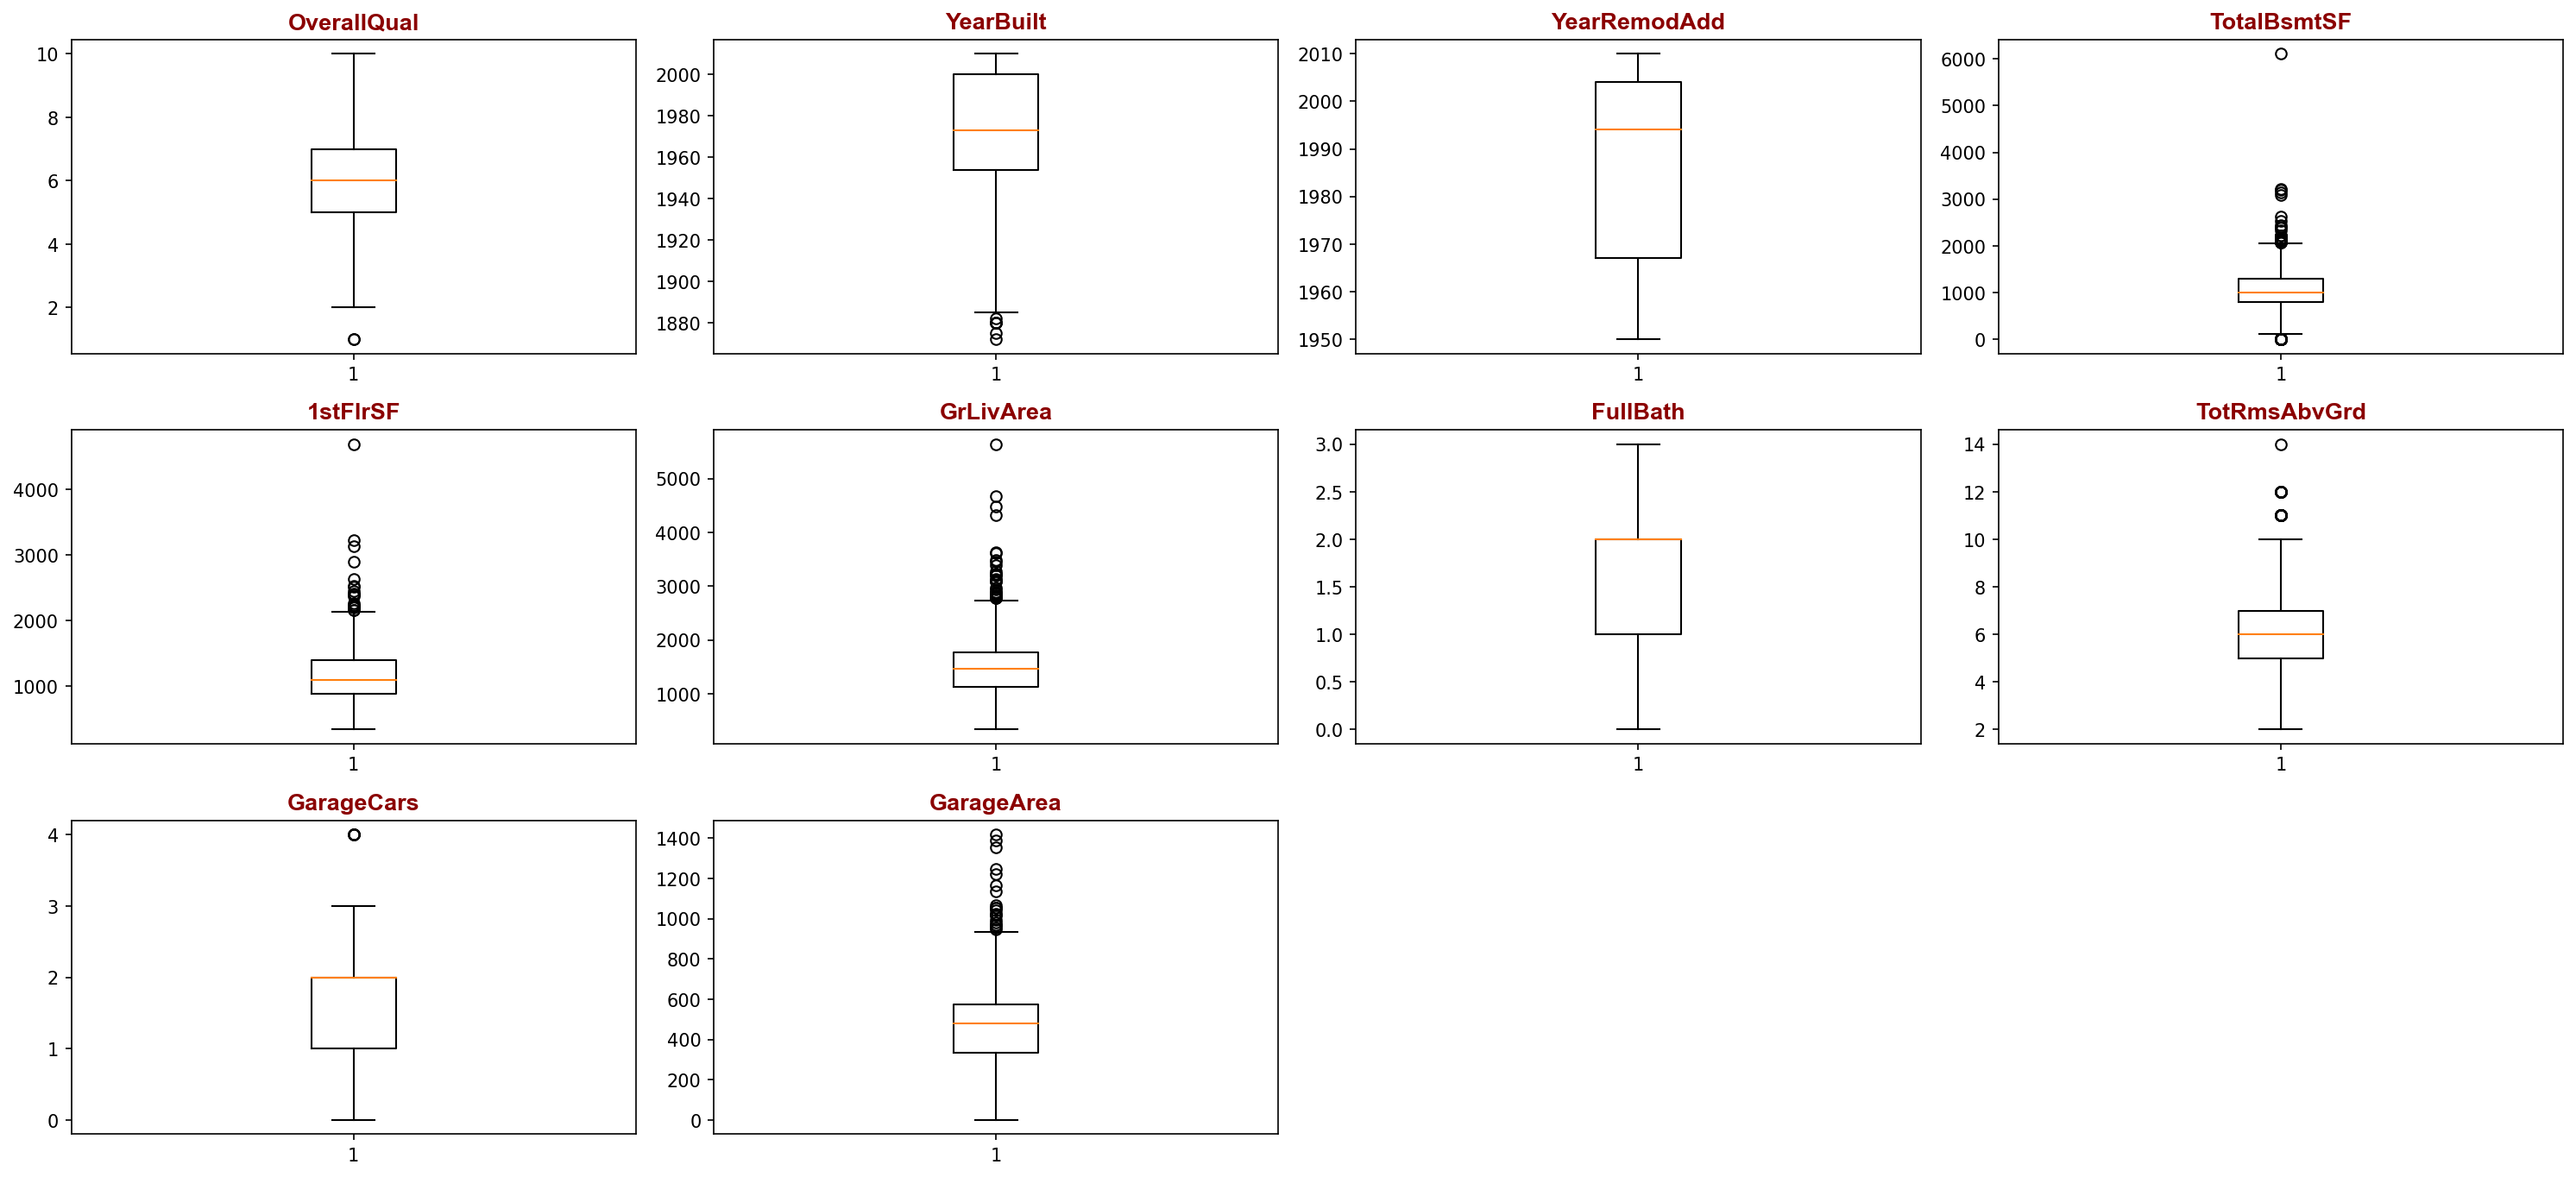

In [21]:
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
n = ["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars",
"GarageArea"]
plt.figure(figsize=(20,15),dpi=150)
for i,col in enumerate(n):
    plt.subplot(5,4,i+1)
    plt.boxplot(col, data=df2)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

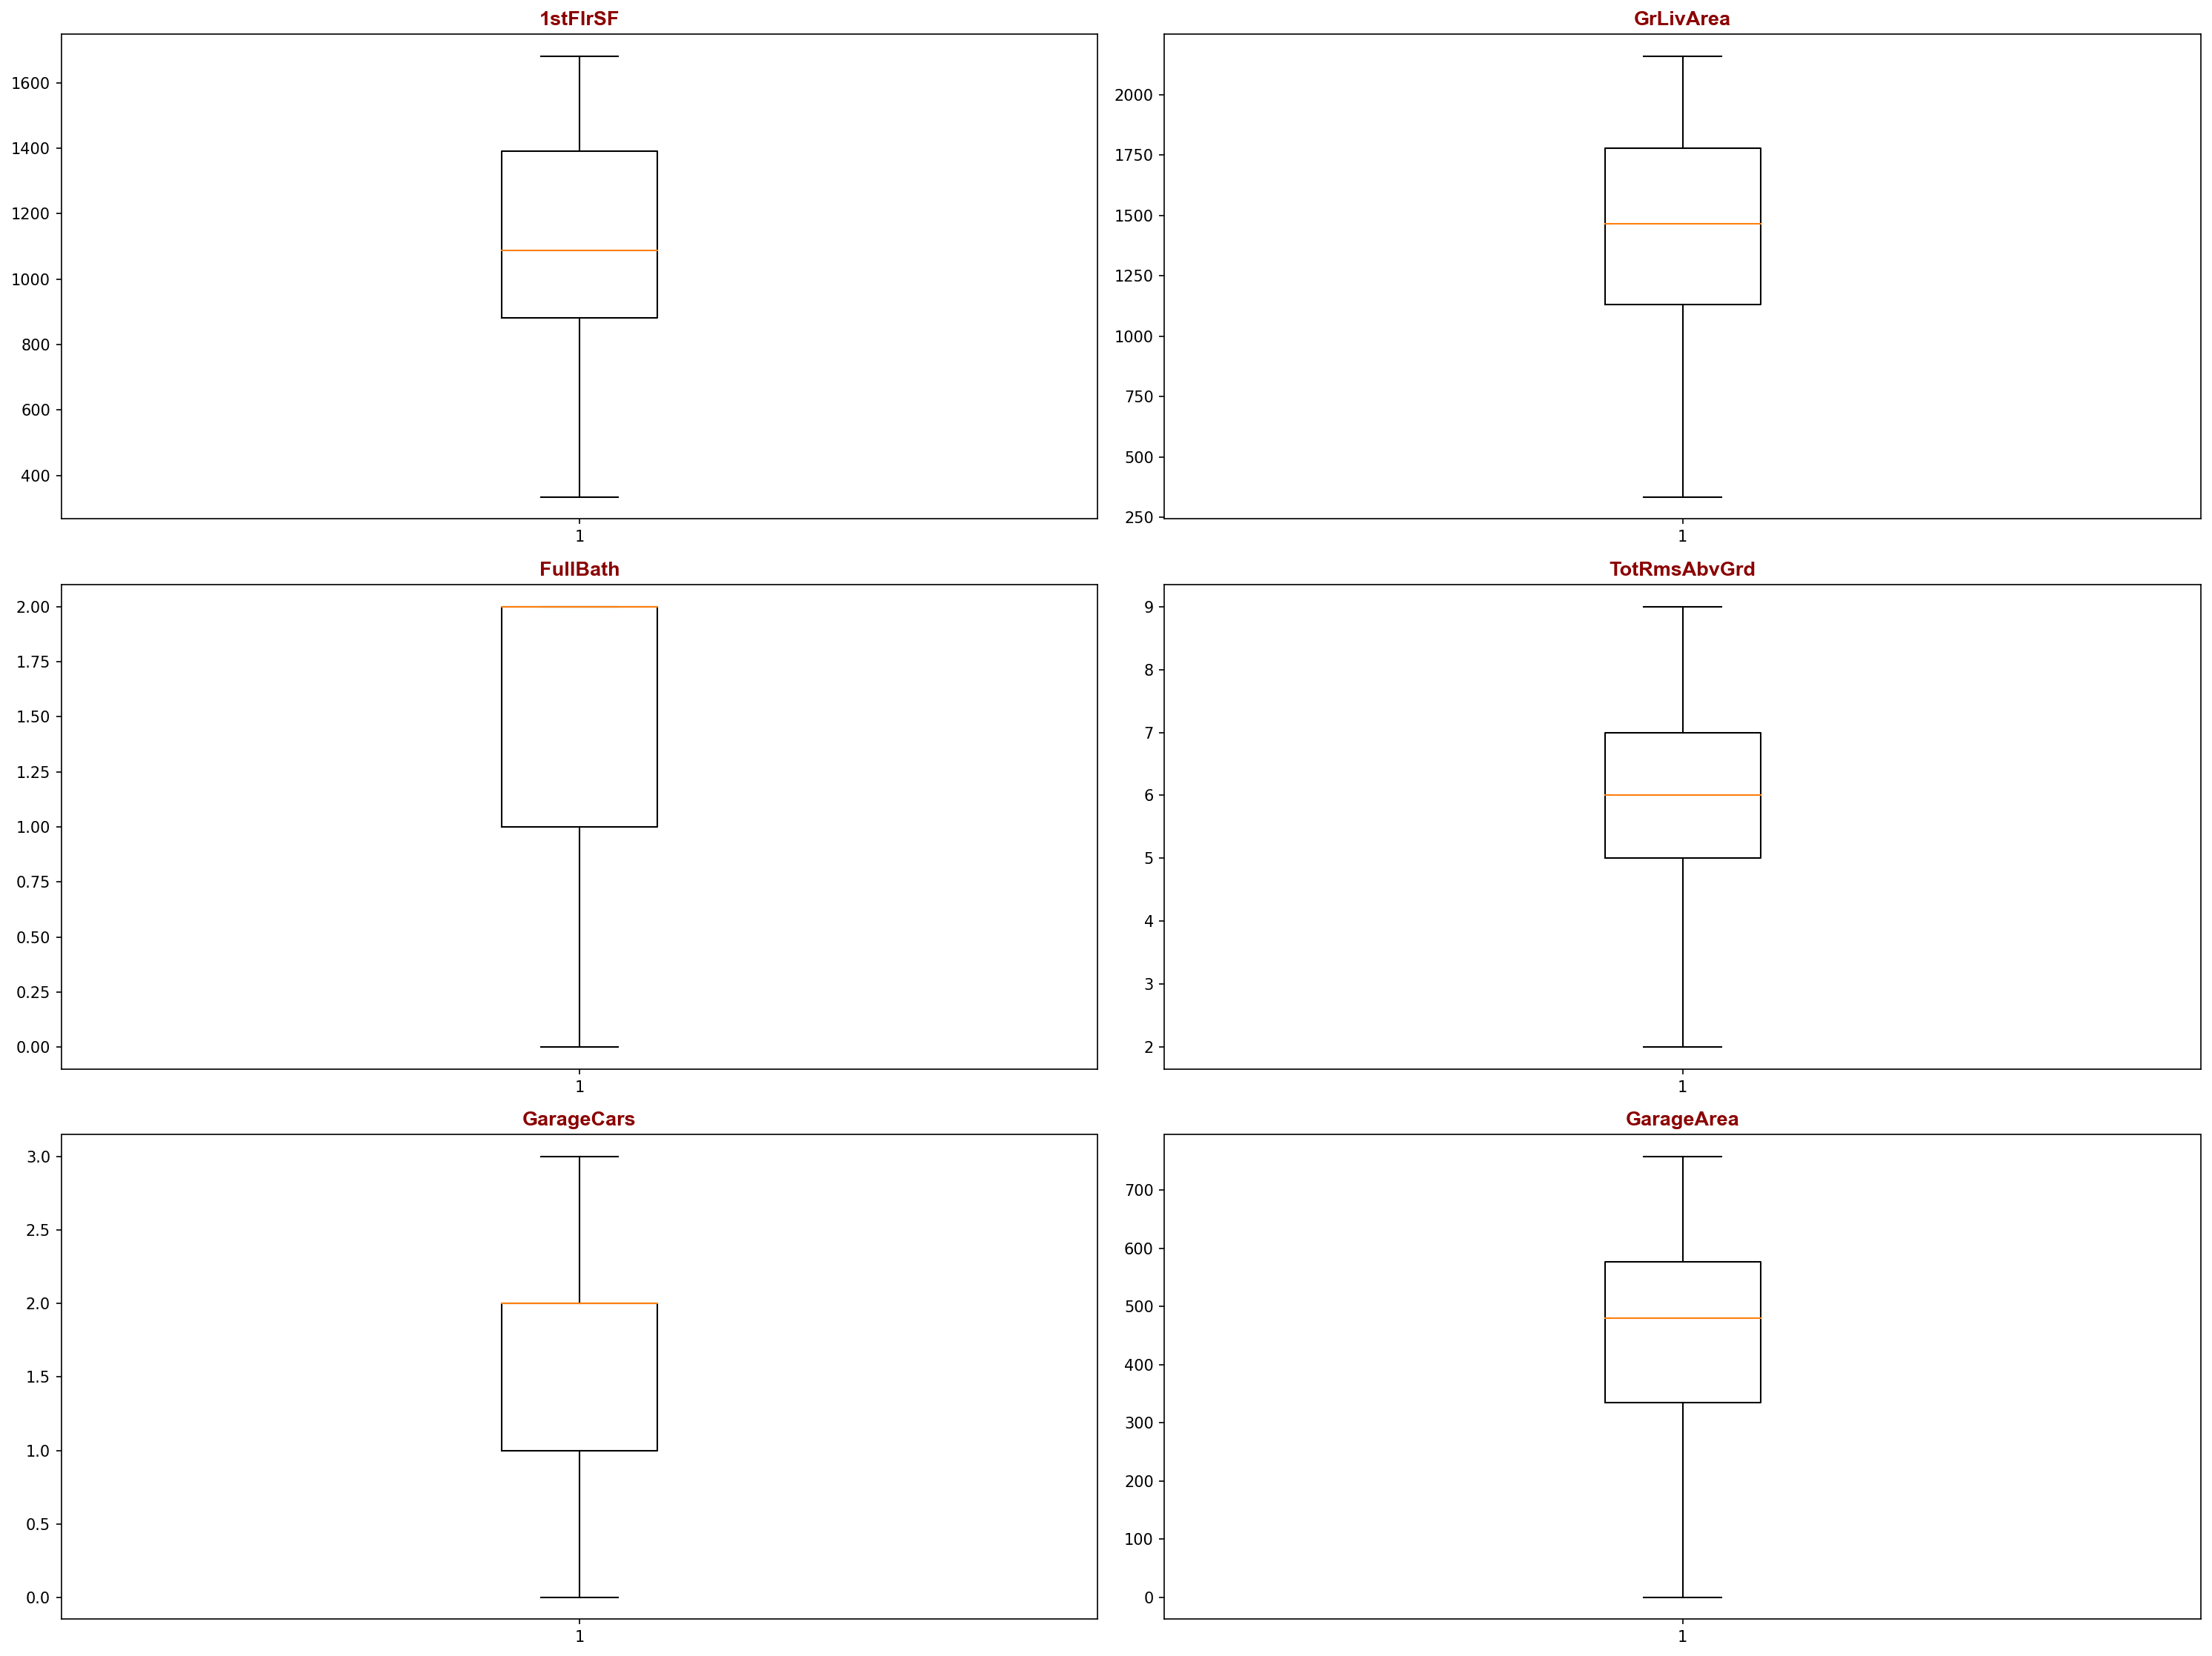

In [23]:
from scipy.stats.mstats import winsorize
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(20,15),dpi=150)
list3 = ["1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]
for i,col in enumerate(list3):
    df2[col] = winsorize(df2[col], (0, 0.10))
    plt.subplot(3,2,i+1)
    plt.boxplot(df2[col])
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

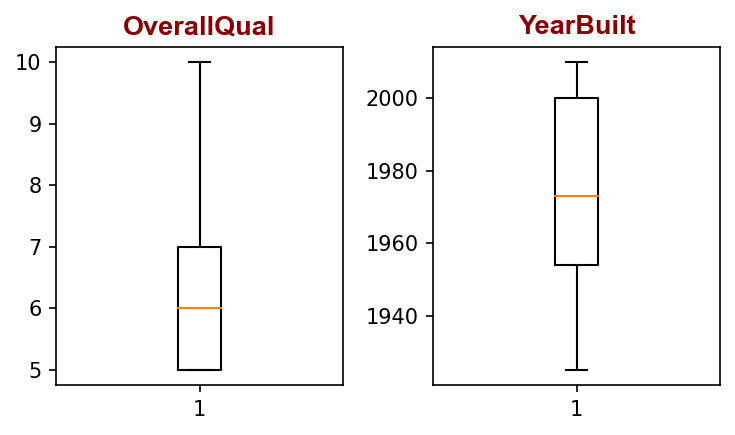

In [24]:
plt.figure(figsize=(5,3),dpi=150)
list5 = ["OverallQual","YearBuilt"]
for i,col in enumerate(list5):
    df2[col] = winsorize(df2[col], (0.10,0))
    plt.subplot(1,2,i+1)
    plt.boxplot(df2[col])
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

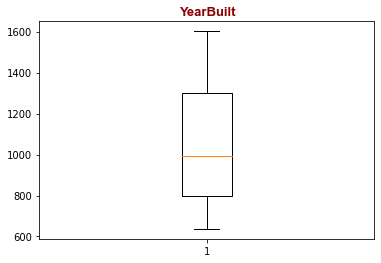

In [25]:
df2["TotalBsmtSF"] = winsorize(df2["TotalBsmtSF"], (0.10, 0.10))
plt.boxplot(df2["TotalBsmtSF"])
plt.title(col, fontdict=baslik_font)
plt.show() 

In [28]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
clmns = ['CentralAir','Street']
for i in clmns:
    df2[i] = lbe.fit_transform(df2[i])
df2

,Id,MSZoning,Street,BldgType,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,SaleCondition,SalePrice
0,1,RL,1,1Fam,7,2003,2003,856,GasA,1,SBrkr,856,1710,2,Gd,8,2,548,Normal,208500
1,2,RL,1,1Fam,6,1976,1976,1262,GasA,1,SBrkr,1262,1262,2,TA,6,2,460,Normal,181500
2,3,RL,1,1Fam,7,2001,2002,920,GasA,1,SBrkr,920,1786,2,Gd,6,2,608,Normal,223500
3,4,RL,1,1Fam,7,1925,1970,756,GasA,1,SBrkr,961,1717,1,Gd,7,3,642,Abnorml,140000
4,5,RL,1,1Fam,8,2000,2000,1145,GasA,1,SBrkr,1145,2158,2,Gd,9,3,757,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,RL,1,1Fam,6,1999,2000,953,GasA,1,SBrkr,953,1647,2,TA,7,2,460,Normal,175000
1456,1457,RL,1,1Fam,6,1978,1988,1542,GasA,1,SBrkr,1680,2073,2,TA,7,2,500,Normal,210000
1457,1458,RL,1,1Fam,7,1941,2006,1152,GasA,1,SBrkr,1188,2158,2,Gd,9,1,252,Normal,266500
1458,1459,RL,1,1Fam,5,1950,1996,1078,GasA,1,FuseA,1078,1078,1,Gd,5,1,240,Normal,142125


In [29]:
clms = ["MSZoning","BldgType","Heating","Electrical","KitchenQual","SaleCondition"]
df2 = pd.concat([df2, pd.get_dummies(df2[clms])], axis=1).drop(clms, axis = 1)
df2

,Id,Street,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,GrLivArea,FullBath,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,1,7,2003,2003,856,1,856,1710,2,...,0,0,1,0,0,0,0,0,1,0
1,2,1,6,1976,1976,1262,1,1262,1262,2,...,0,0,0,1,0,0,0,0,1,0
2,3,1,7,2001,2002,920,1,920,1786,2,...,0,0,1,0,0,0,0,0,1,0
3,4,1,7,1925,1970,756,1,961,1717,1,...,0,0,1,0,1,0,0,0,0,0
4,5,1,8,2000,2000,1145,1,1145,2158,2,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1,6,1999,2000,953,1,953,1647,2,...,0,0,0,1,0,0,0,0,1,0
1456,1457,1,6,1978,1988,1542,1,1680,2073,2,...,0,0,0,1,0,0,0,0,1,0
1457,1458,1,7,1941,2006,1152,1,1188,2158,2,...,0,0,1,0,0,0,0,0,1,0
1458,1459,1,5,1950,1996,1078,1,1078,1078,1,...,0,0,1,0,0,0,0,0,1,0


In [31]:
from sklearn import linear_model
X = df2.drop(["SalePrice"], axis = 1)
Y = df2.SalePrice

lineer_model = linear_model.LinearRegression()
lineer_model.fit(X,Y)

print("Coefficents : {}".format(lineer_model.coef_))
print("\nIntercept : {}".format(lineer_model.intercept_))


import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

results.summary()

Coefficents : [-1.25570490e+00 -1.34848684e+04  2.25859909e+04  1.24443652e+02
  1.86538647e+02  4.25376404e+01  9.73286792e+03  8.19620027e-01
  5.53452254e+01 -1.15636668e+04  7.11847992e+02  1.02946491e+04
  6.19660921e+00 -2.73912125e+04  7.19797376e+03  1.23657350e+04
  8.76002460e+03 -9.32520867e+02  1.11728273e+04  8.17469464e+03
 -1.22818810e+04 -4.37531876e+03 -2.69032225e+03  6.59721289e+03
  3.83780953e+03  5.84922328e+03  9.80249625e+03 -5.28010062e+04
  2.67142642e+04  4.77517495e+03  2.71164939e+02  3.60847562e+03
 -1.78882994e+04  9.23348384e+03  3.71086444e+04 -1.45271393e+04
 -9.60835049e+03 -1.29731546e+04 -1.29373463e+04  1.81774047e+04
  1.19152550e+04 -2.03755937e+04 -3.53307403e+03  6.75335429e+03]

Intercept : -721725.369045983


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     155.7
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        00:51:25   Log-Likelihood:                -17346.
No. Observations:                1460   AIC:                         3.477e+04
Df Residuals:                    1421   BIC:                         3.498e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.306e+05   7.05e+04     -4.688      0.000   -4.69e+05   -1.92e+05
Id                       -1.2557      2.231     -0.563      0.574      -5.632       3.121
Street                -1.348e+04   1.53e+04     -0.882      0.378   -4.35e+04    1.65e+04
OverallQual            2.259e+04   1393.057     16.213      0.000    1.99e+04    2.53e+04
YearBuilt               124.4437     63.345      1.965      0.050       0.184     248.704
YearRemodAdd            186.5386     68.819      2.711      0.007      51.541     321.537
TotalBsmtSF              42.5376      6.535      6.510      0.000      29.719      55.356
CentralAir             9732.8679   5048.480      1.928      0.054    -170.407    1.96e+04
1stFlrSF                  0.8196      6.499      0.126      0.900     -11.929      13.568
GrLivArea                55.3452      4.996     11.078      0.000      45.545      65.145
FullBath              -1.156e+04   2806.123     -4.121      0.000   -1.71e+04   -6059.077
TotRmsAbvGrd            711.8480   1261.921      0.564      0.573   -1763.581    3187.277
GarageCars             1.029e+04   3171.688      3.246      0.001    4072.955    1.65e+04
GarageArea                6.1966     11.885      0.521      0.602     -17.118      29.511
MSZoning_C (all)       -9.35e+04   1.68e+04     -5.581      0.000   -1.26e+05   -6.06e+04
MSZoning_FV           -5.891e+04   1.54e+04     -3.815      0.000   -8.92e+04   -2.86e+04
MSZoning_RH           -5.375e+04   1.62e+04     -3.316      0.001   -8.55e+04    -2.2e+04
MSZoning_RL           -5.735e+04   1.48e+04     -3.880      0.000   -8.64e+04   -2.84e+04
MSZoning_RM           -6.704e+04   1.42e+04     -4.707      0.000    -9.5e+04   -3.91e+04
BldgType_1Fam         -5.494e+04   1.41e+04     -3.909      0.000   -8.25e+04   -2.74e+04
BldgType_2fmCon       -5.794e+04   1.48e+04     -3.910      0.000    -8.7e+04   -2.89e+04
BldgType_Duplex       -7.839e+04   1.48e+04     -5.282      0.000   -1.08e+05   -4.93e+04
BldgType_Twnhs        -7.049e+04   1.54e+04     -4.572      0.000   -1.01e+05   -4.02e+04
BldgType_TwnhsE        -6.88e+04   1.49e+04     -4.605      0.000   -9.81e+04   -3.95e+04
Heating_Floor          -4.85e+04   3.26e+04     -1.487      0.137   -1.12e+05    1.55e+04
Heating_GasA          -5.126e+04   1.47e+04     -3.491      0.000   -8.01e+04   -2.25e+04
Heating_GasW          -4.924e+04   1.57e+04     -3.130      0.002   -8.01e+04   -1.84e+04
Heating_Grav          -4.529e+04   1.83e+04     -2.477      0.013   -8.12e+04   -9426.271
Heating_OthW          -1.079e+05   2.56e+04     -4.210      0.000   -1.58e+05   -5.76e+04
Heating_Wall          -2.838e+04   2.09e+04     -1.357      0.175   -6.94e+04    1.27e+04
Electrical_FuseA      -6.134e+04   1.63e+04     -3.774      0.000   -9.32e+04   -2.95e+04
Electrical_FuseF      -